In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data_set=pd.read_csv("heart_final.csv")
print("(Rows, columns): " + str(data_set.shape))
data_set.columns

(Rows, columns): (1190, 12)


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [37]:
data_set.head(20)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [4]:
print(data_set.isna().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [5]:
dup_row=data_set[data_set.duplicated()]
print("Duplicate Rows: \n{}".format(dup_row))

Duplicate Rows: 
      age  sex  chest pain type  resting bp s  cholesterol  \
163    49    0                2           110          208   
604    58    1                3           150          219   
887    63    1                1           145          233   
888    67    1                4           160          286   
889    67    1                4           120          229   
...   ...  ...              ...           ...          ...   
1156   42    1                3           130          180   
1157   61    1                4           140          207   
1158   66    1                4           160          228   
1159   46    1                4           140          311   
1160   71    0                4           112          149   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
163                     0            0             160                0   
604                     0            1             118                1   
887          

In [6]:
DF_RM_DUP = data_set.drop_duplicates(keep='first')
print('\n\nDuplicate value removed from DataFrame' )
data_set=DF_RM_DUP



Duplicate value removed from DataFrame


In [7]:
data_set.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
data_set['target'].value_counts()

1    508
0    410
Name: target, dtype: int64

In [9]:
import seaborn as sns

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

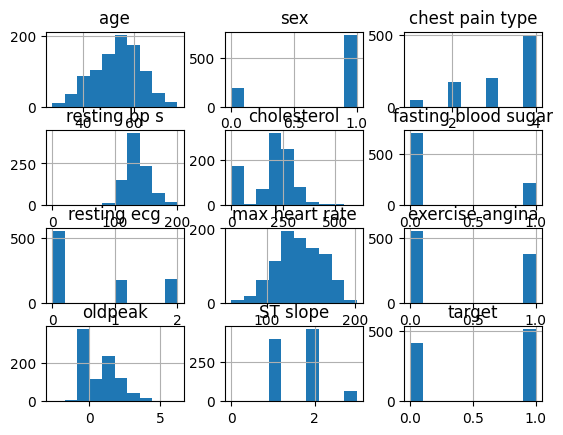

In [10]:
data_set.hist()

<Axes: >

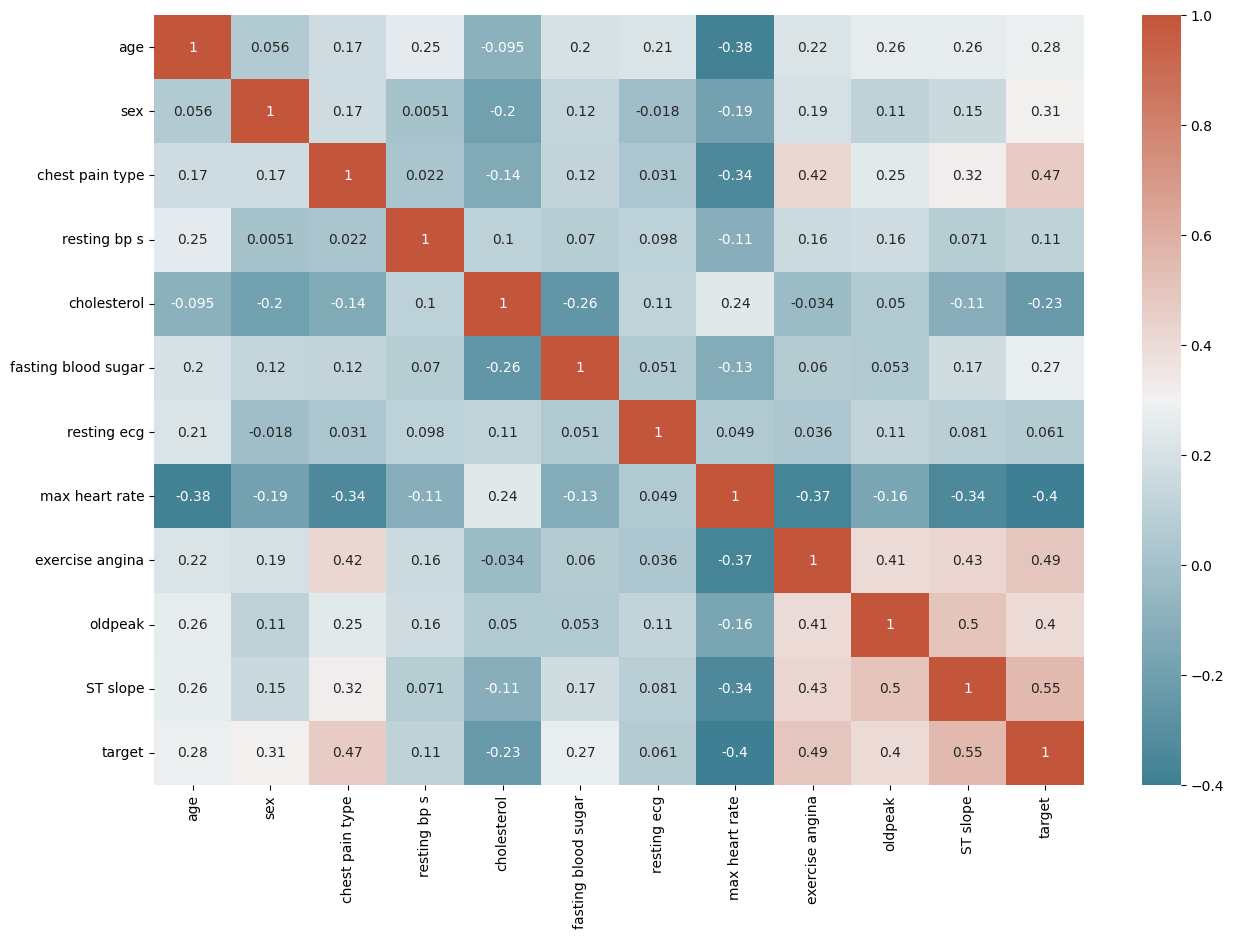

In [11]:
corr = data_set.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [12]:
x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values      #dependent

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [14]:
x_train.shape

(734, 11)

In [15]:
x_test.shape

(184, 11)

In [16]:
y_train.shape

(734,)

In [17]:
y_test.shape

(184,)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
# Initialize an empty list to store accuracy values for different settings
accuracy_values = []

# Replace the loop range and parameters with the ones you want to experiment with
for n_trees in range(1,100, 5):
    # Initialize the Random Forest classifier with the desired settings
    rf_clf = RandomForestClassifier(n_estimators=n_trees, random_state=1)

    # Train the classifier on the training data
    rf_clf.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = rf_clf.predict(x_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)


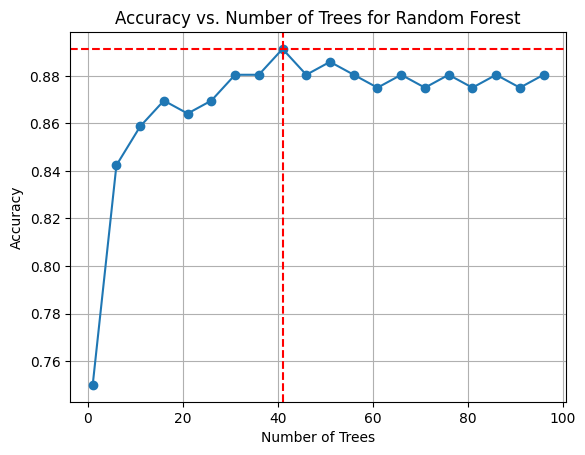

x-values at y-value: [41]


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for illustration purposes
x_values = range(1, 100, 5) 
# Plot the accuracy values
plt.plot(x_values, accuracy_values, marker='o', label='Accuracy')

# The y-coordinate at which you want to draw the parallel line
y_value = np.max(accuracy_values)

# Find the indices where accuracy_values matches y_value
indices = np.where(accuracy_values == y_value)

# Get the corresponding x-values from x_values using the indices
x_values_at_y_value = np.array(x_values)[indices]

# Plot the parallel line
plt.axhline(y=y_value, color='red', linestyle='--', label='Parallel Line')
for x_value in x_values_at_y_value:
    plt.axvline(x=x_value, color='red', linestyle='--', label='Parallel Line')

# Set labels and title
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees for Random Forest')
# Display the plot
plt.grid(True)
plt.show()


print("x-values at y-value:", x_values_at_y_value)

In [30]:

model = RandomForestClassifier(n_estimators=x_value,random_state=1)# get instance of model
model.fit(x_train, y_train) # Train/Fit model 


RandomForestClassifier(n_estimators=41, random_state=1)

In [31]:
y_pred = model.predict(x_test) # get y predictions
val=(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(val[:5])
#First value represents our predicted value, Second value represents our actual value.

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [32]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[65  9]
 [11 99]]


0.8913043478260869

In [33]:
# get importance
importance = model.feature_importances_
print('Feature\t Score')
# summarize feature importance
for i,v in enumerate(importance):
    print(i,'\t',v)

Feature	 Score
0 	 0.0852505024554737
1 	 0.036062926047326055
2 	 0.12341183042233145
3 	 0.08271375853679523
4 	 0.1192765614228306
5 	 0.01985391287616855
6 	 0.028021223447750335
7 	 0.11448359731572617
8 	 0.0843330824728599
9 	 0.09874919454232528
10 	 0.20784341046041277


([<matplotlib.axis.YTick at 0x2096087e7c0>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'sex'),
  Text(0, 2, 'chest pain type'),
  Text(0, 3, 'resting bp s'),
  Text(0, 4, 'cholesterol'),
  Text(0, 5, 'fasting blood sugar'),
  Text(0, 6, 'resting ecg'),
  Text(0, 7, 'max heart rate'),
  Text(0, 8, 'exercise angina'),
  Text(0, 9, 'oldpeak'),
  Text(0, 10, 'ST slope')])

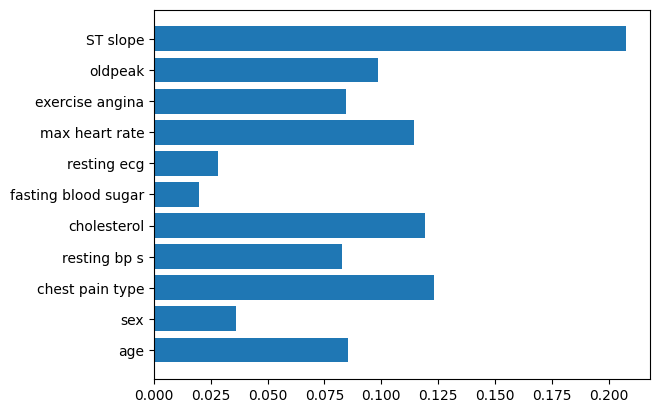

In [34]:
import matplotlib.pyplot as plt
index= data_set.columns[:-1]
importance = pd.Series(model.feature_importances_)
y_pos=np.arange(len(index))
plt.barh(y_pos,importance)
plt.yticks(y_pos,index)
#importance.nlargest(13).plot(kind='bar', colormap='winter')

In [46]:
#Predictibg from the model
li=[20,1,1,180,192,1,0,90,0,1,1]
li2=[57,0,3,190,236,1,0,174,0,1,2]
p=model.predict(sc.transform([li2]))
if(p==1):
    print("Heart Patient")
else:
    print("Healthy")


Heart Patient
